In [1]:
import cv2
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers
tensorflow.__version__

'2.12.0'

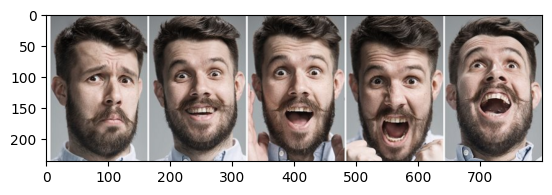

In [64]:
imagem = cv2.imread('Material/testes/teste01.png')  # le a imagem do arquivo
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # converte de BGR para RGB
plt.imshow(imagem)  # exibe a imagem utilizando o matplotlib

In [23]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)


2.12.0
2.12.0


In [43]:
cascade_faces = 'Material/haarcascade_frontalface_default.xml'  # caminho para o classificador Haar Cascade de faces
caminho_modelo = 'Material/modelo_02_expressoes.h5'  # caminho para o modelo treinado de expressões faciais
face_detection = cv2.CascadeClassifier(cascade_faces)  # detecção de faces utilizando o classificador Haar

classificador_emocoes = load_model(caminho_modelo, compile=False, safe_mode=False)# carrega o modelo de expressões faciais
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]  # lista de expressões faciais

In [44]:
original = imagem.copy()  # faz uma cópia da imagem original
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20, 20))  # detectou a posição dos pixeis da face
faces  # retorna as coordenadas das faces detectadas


array([[328,  27, 163, 163],
       [171,  33, 158, 158],
       [660,  28, 130, 130],
       [ 32,  46, 145, 145],
       [482,  44, 163, 163]])

In [45]:
imagem.shape  # obtem as dimensoes da imagem (altura, largura, canais RGB)
len(faces)  # retorna o numero de faces detectadas
faces.shape  # obtem as dimensoes do array de faces (quantidade de faces detectadas, coordenadas de cada face)

(5, 4)

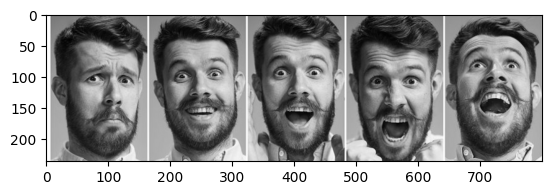

In [46]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)  # converte a imagem para escala de cinza
plt.imshow(cinza, cmap='gray')  # exibe a imagem em escala de cinza

In [47]:
roi = cinza[40:40 + 128, 162:162 + 128] 

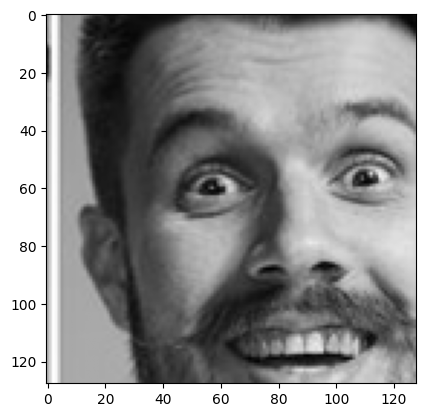

In [48]:
plt.imshow(roi, cmap='gray')

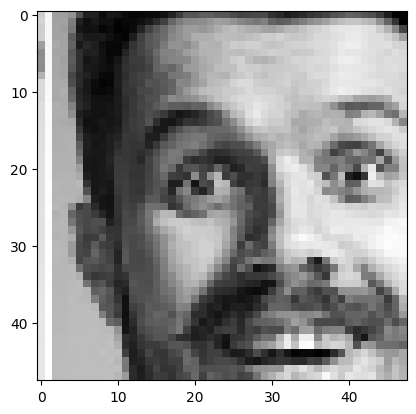

In [49]:
# redimensionar
roi = cv2.resize(roi, (48, 48))  # diminui os pixeis, isso garente uma maior eficiencia
plt.imshow(roi, cmap='gray')  # exibe a região de interesse redimensionada em escala de cinza

In [50]:
roi.dtype
roi = roi.astype('float')
roi.dtype
roi

array([[185., 218., 145., ...,  34.,  10.,  11.],
       [189., 219., 146., ...,  95.,  51.,   8.],
       [185., 219., 149., ..., 162., 122.,  67.],
       ...,
       [206., 227., 168., ..., 141., 164., 153.],
       [206., 227., 168., ..., 148., 176., 159.],
       [206., 227., 168., ..., 157., 175., 162.]])

In [51]:
roi = roi / 255
roi

array([[0.7254902 , 0.85490196, 0.56862745, ..., 0.13333333, 0.03921569,
        0.04313725],
       [0.74117647, 0.85882353, 0.57254902, ..., 0.37254902, 0.2       ,
        0.03137255],
       [0.7254902 , 0.85882353, 0.58431373, ..., 0.63529412, 0.47843137,
        0.2627451 ],
       ...,
       [0.80784314, 0.89019608, 0.65882353, ..., 0.55294118, 0.64313725,
        0.6       ],
       [0.80784314, 0.89019608, 0.65882353, ..., 0.58039216, 0.69019608,
        0.62352941],
       [0.80784314, 0.89019608, 0.65882353, ..., 0.61568627, 0.68627451,
        0.63529412]])

In [52]:
roi = np.expand_dims(roi, axis = 0) 
roi.shape

(1, 48, 48)

In [53]:
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 100ms/step


In [54]:
preds

array([1.3512865e-02, 2.5800528e-04, 5.6540579e-02, 6.8156093e-01,
       6.4131985e-03, 2.3840493e-01, 3.3095032e-03], dtype=float32)

In [55]:
emotion_probability = np.max(preds)
emotion_probability

0.68156093

In [56]:
label = expressoes[preds.argmax()]
label

'Feliz'

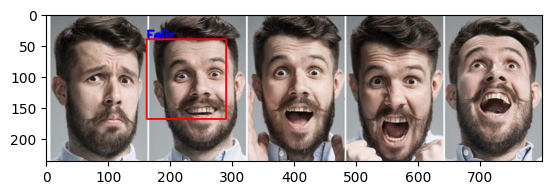

In [57]:
# resultados
cv2.putText(original, label, (162, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)  # adiciona o texto (label) na imagem
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (255, 0, 0), 2)  # desenha um retângulo ao redor da face
plt.imshow(original)  # exibe a imagem com os resultados (texto e retângulo)

In [58]:
probabilidades = np.ones((250, 300, 3), dtype='uint8') * 255  # cria uma imagem branca de 250x300 pixels com 3 canais (RGB)
probabilidades  # exibe a imagem com as probabilidades (imagem branca)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

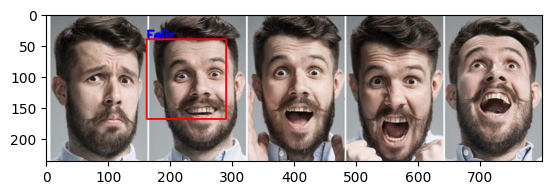

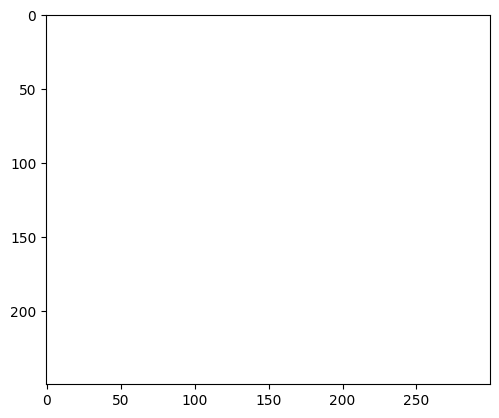

In [59]:
plt.imshow(original)  # exibe a imagem original
plt.show()  # exibe a imagem em uma janela

if len(faces) == 1:  # verifica se há apenas uma face detectada
    for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):  # itera pelas expressões e probabilidades
        text = '{}: {:.2f}%'.format(emotion, prob * 100)  # formata o texto com o nome da emoção e a probabilidade
        w = int(prob * 300)  # calcula a largura proporcional a probabilidade
        cv2.rectangle(probabilidades, (7, (i * 35) + 5),  # desenha um retângulo com base na probabilidade
                      (w, (i * 35) + 35), (200, 255, 20), -1)  # preenche o retângulo com cor
        cv2.putText(probabilidades, text, (10, (i * 35) + 23),  # adiciona o texto da emoção na imagem
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)  # define fonte e estilo do texto

plt.imshow(probabilidades)  # exibe a imagem com as probabilidades
plt.show()  # exibe a imagem com as probabilidades
